To begin, I will import a general collection of libraries. 

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


I have first decided to look at the retionship between budget, and profit. To do so, I will be importing the data from X and Y. 

In [133]:
gross = pd.read_csv('/Users/molly/flatiron-ds-course/project1/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/bom.movie_gross.csv.gz')
budget = pd.read_csv('/Users/molly/flatiron-ds-course/project1/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/tn.movie_budgets.csv.gz')

Now that both the gross profit and the budget data has been imported, I will take a superficial look at the data. 

In [134]:
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [135]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


I see automatically that both sets of data have entry points under the exact same headings: id, release_date, movie, production_budget, domestic_gross, and worldwide_gross. 
Additionally, I see that the first five entries in both datasets have the same values under id, release_date, movie, production_budge, domestic_gross, and worldwide_gross. From the head alone, it looks as though these may be the exact same set of data. I will further investigate. 

In [136]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [137]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Now that I have selected the info for each data set, I can see that they are not in fact the same. Since the budget dataset seems to be much longer, I'll take a look at their tails to see where each one ends. 

In [138]:
gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [139]:
gross.sample(10)

,title,studio,domestic_gross,foreign_gross,year
3075,Singularity,VE,4200.0,NaN,2017
1724,Force Majeure,Magn.,1400000.0,NaN,2014
1776,The Last Sentence,MBox,62500.0,265000,2014
1515,Into the Woods,BV,128000000.0,85100000,2014
1240,The Big Wedding,LGF,21800000.0,24700000,2013
331,The Twilight Saga: Breaking Dawn Part 1,Sum.,281300000.0,430900000,2011
1165,White House Down,Sony,73100000.0,132300000,2013
562,Take Shelter,SPC,1700000.0,1400000,2011
2228,Flowers,MBox,61600.0,NaN,2015
3242,Soorma,Sony,390000.0,6200000,2018


In [140]:
budget.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [141]:
gross.isnull().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [142]:
budget.isnull().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

There are no missing values in the budget dataset. I will now determine how many missing values are in the profit dataset.

In [143]:
gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Because only 28 data points are missing under domestic gross, I will replace the null values with the mean value of that column. 

In [144]:
mean_domestic = gross['domestic_gross'].mean()

In [145]:
mean_domestic

28745845.06698422

In [146]:
gross['domestic_gross'].fillna(mean_domestic, inplace=True)

In [147]:
gross.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

Because the studio is an object and not an intejer, I will replace the null values with "Studio Unknown". 

In [148]:
gross['studio'].fillna("Unknown Studio", inplace=True)

In [149]:
gross.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [150]:
gross.drop('foreign_gross', axis=1, inplace=True)

In [151]:
gross.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [152]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
title             3387 non-null object
studio            3387 non-null object
domestic_gross    3387 non-null float64
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [153]:
to_concat = [gross, budget]
gross_and_profit = pd.concat(to_concat)

/Users/molly/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [154]:
gross_and_profit.head()

,domestic_gross,id,movie,production_budget,release_date,studio,title,worldwide_gross,year
0,4.15e+08,NaN,NaN,NaN,NaN,BV,Toy Story 3,NaN,2010.0
1,3.342e+08,NaN,NaN,NaN,NaN,BV,Alice in Wonderland (2010),NaN,2010.0
2,2.96e+08,NaN,NaN,NaN,NaN,WB,Harry Potter and the Deathly Hallows Part 1,NaN,2010.0
3,2.926e+08,NaN,NaN,NaN,NaN,WB,Inception,NaN,2010.0
4,2.387e+08,NaN,NaN,NaN,NaN,P/DW,Shrek Forever After,NaN,2010.0


In [155]:
gross_and_profit.isnull().sum()

domestic_gross          0
id                   3387
movie                3387
production_budget    3387
release_date         3387
studio               5782
title                5782
worldwide_gross      3387
year                 5782
dtype: int64

In [156]:
gross_and_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9169 entries, 0 to 5781
Data columns (total 9 columns):
domestic_gross       9169 non-null object
id                   5782 non-null float64
movie                5782 non-null object
production_budget    5782 non-null object
release_date         5782 non-null object
studio               3387 non-null object
title                3387 non-null object
worldwide_gross      5782 non-null object
year                 3387 non-null float64
dtypes: float64(2), object(7)
memory usage: 716.3+ KB


In [157]:
gross_and_profit.sample(10)

,domestic_gross,id,movie,production_budget,release_date,studio,title,worldwide_gross,year
4424,"$52,700,832",25.0,Four Weddings and a Funeral,"$4,500,000","Mar 9, 1994",NaN,NaN,"$242,895,809",NaN
5734,$0,35.0,Her Cry: La Llorona Investigation,"$35,000","Oct 25, 2013",NaN,NaN,$0,NaN
1416,105000,NaN,NaN,NaN,NaN,Cdgm.,The English Teacher,NaN,2013.0
745,1.553e+08,NaN,NaN,NaN,NaN,Uni.,Snow White and the Huntsman,NaN,2012.0
2721,$0,22.0,The Frozen Ground,"$19,200,000","Aug 23, 2013",NaN,NaN,"$5,617,460",NaN
124,"$85,576,941",25.0,Godzilla: King of the Monsters,"$170,000,000","May 31, 2019",NaN,NaN,"$299,276,941",NaN
3905,"$3,759,286",6.0,Anomalisa,"$8,000,000","Dec 30, 2015",NaN,NaN,"$5,706,168",NaN
1739,2.87458e+07,NaN,NaN,NaN,NaN,Crnth,Lila Lila,NaN,2014.0
5647,"$1,321,194",48.0,Another Earth,"$175,000","Jul 22, 2011",NaN,NaN,"$2,102,779",NaN
694,51200,NaN,NaN,NaN,NaN,Kino,Battleship Potemkin (2011 re-issue),NaN,2011.0


After combining the datasets, I have realized that the null values in the movie column should be filled with the non-null values of the title column. 

In [158]:
gross_and_profit.set_index('movie')

,domestic_gross,id,production_budget,release_date,studio,title,worldwide_gross,year
movie,,,,,,,,
NaN,4.15e+08,NaN,NaN,NaN,BV,Toy Story 3,NaN,2010.0
NaN,3.342e+08,NaN,NaN,NaN,BV,Alice in Wonderland (2010),NaN,2010.0
NaN,2.96e+08,NaN,NaN,NaN,WB,Harry Potter and the Deathly Hallows Part 1,NaN,2010.0
NaN,2.926e+08,NaN,NaN,NaN,WB,Inception,NaN,2010.0
NaN,2.387e+08,NaN,NaN,NaN,P/DW,Shrek Forever After,NaN,2010.0
...,...,...,...,...,...,...,...,...
Red 11,$0,78.0,"$7,000","Dec 31, 2018",NaN,NaN,$0,NaN
Following,"$48,482",79.0,"$6,000","Apr 2, 1999",NaN,NaN,"$240,495",NaN
Return to the Land of Wonders,"$1,338",80.0,"$5,000","Jul 13, 2005",NaN,NaN,"$1,338",NaN


In [159]:
gross_and_profit['movie'] = gross_and_profit['movie'].fillna(gross_and_profit['title'])

In [160]:
gross_and_profit.head()

,domestic_gross,id,movie,production_budget,release_date,studio,title,worldwide_gross,year
0,4.15e+08,NaN,Toy Story 3,NaN,NaN,BV,Toy Story 3,NaN,2010.0
1,3.342e+08,NaN,Alice in Wonderland (2010),NaN,NaN,BV,Alice in Wonderland (2010),NaN,2010.0
2,2.96e+08,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,WB,Harry Potter and the Deathly Hallows Part 1,NaN,2010.0
3,2.926e+08,NaN,Inception,NaN,NaN,WB,Inception,NaN,2010.0
4,2.387e+08,NaN,Shrek Forever After,NaN,NaN,P/DW,Shrek Forever After,NaN,2010.0


After the missing movie values are filled, I no longer need the title column, so I will drop it, and then check to see if there are any null movie values left. 

In [161]:
gross_and_profit.drop('title', axis=1, inplace=True)

In [162]:
gross_and_profit.head()

,domestic_gross,id,movie,production_budget,release_date,studio,worldwide_gross,year
0,4.15e+08,NaN,Toy Story 3,NaN,NaN,BV,NaN,2010.0
1,3.342e+08,NaN,Alice in Wonderland (2010),NaN,NaN,BV,NaN,2010.0
2,2.96e+08,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,WB,NaN,2010.0
3,2.926e+08,NaN,Inception,NaN,NaN,WB,NaN,2010.0
4,2.387e+08,NaN,Shrek Forever After,NaN,NaN,P/DW,NaN,2010.0


In [163]:
gross_and_profit.drop('id', axis=1, inplace=True)

In [164]:
gross_and_profit.head()

,domestic_gross,movie,production_budget,release_date,studio,worldwide_gross,year
0,4.15e+08,Toy Story 3,NaN,NaN,BV,NaN,2010.0
1,3.342e+08,Alice in Wonderland (2010),NaN,NaN,BV,NaN,2010.0
2,2.96e+08,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,WB,NaN,2010.0
3,2.926e+08,Inception,NaN,NaN,WB,NaN,2010.0
4,2.387e+08,Shrek Forever After,NaN,NaN,P/DW,NaN,2010.0


In [165]:
gross_and_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9169 entries, 0 to 5781
Data columns (total 7 columns):
domestic_gross       9169 non-null object
movie                9169 non-null object
production_budget    5782 non-null object
release_date         5782 non-null object
studio               3387 non-null object
worldwide_gross      5782 non-null object
year                 3387 non-null float64
dtypes: float64(1), object(6)
memory usage: 573.1+ KB


In [166]:
gross_and_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9169 entries, 0 to 5781
Data columns (total 7 columns):
domestic_gross       9169 non-null object
movie                9169 non-null object
production_budget    5782 non-null object
release_date         5782 non-null object
studio               3387 non-null object
worldwide_gross      5782 non-null object
year                 3387 non-null float64
dtypes: float64(1), object(6)
memory usage: 573.1+ KB


Quickly getting rid of any movies with duplicate titles. All other columns will be able to accept duplicates. 

In [167]:
gross_and_profit.drop_duplicates(subset='movie', inplace=True)

In [168]:
gross_and_profit.duplicated().sum()

0

In [169]:
gross_and_profit.isnull().sum()

domestic_gross          0
movie                   0
production_budget    3386
release_date         3386
studio               4460
worldwide_gross      3386
year                 4460
dtype: int64

In [170]:
gross_and_profit.sample(10)

,domestic_gross,movie,production_budget,release_date,studio,worldwide_gross,year
525,6.9e+06,Cedar Rapids,NaN,NaN,FoxS,NaN,2011.0
1985,1.9e+06,Legend,NaN,NaN,Uni.,NaN,2015.0
5420,"$1,537,860",A Hard Day's Night,"$560,000","Aug 11, 1964",NaN,"$1,626,784",NaN
1885,"$53,695,808",P.S. I Love You,"$30,000,000","Dec 21, 2007",NaN,"$155,769,678",NaN
5357,"$98,000,000",Billy Jack,"$800,000","Jan 1, 1971",NaN,"$98,000,000",NaN
1840,"$145,096,820",American Pie 2,"$30,000,000","Aug 10, 2001",NaN,"$286,500,000",NaN
1023,366000,The Oranges,NaN,NaN,ATO,NaN,2012.0
1400,100000,The Silence,NaN,NaN,MBox,NaN,2013.0
4608,"$5,923,044",Evil Dead II,"$3,500,000","Mar 13, 1987",NaN,"$5,926,177",NaN
5593,$0,The Christmas Bunny,"$250,000","Dec 31, 2010",NaN,$0,NaN


In [171]:
gross_and_profit['release_date'] = gross_and_profit['release_date'].fillna(gross_and_profit['year'])

In [173]:
gross_and_profit.drop('year', axis=1, inplace=True)

In [174]:
gross_and_profit.sample(10)

,domestic_gross,movie,production_budget,release_date,studio,worldwide_gross
2381,7.62e+07,Pete's Dragon (2016),NaN,2016,BV,NaN
1862,7100,Plot for Peace,NaN,2014,Unknown Studio,NaN
3836,"$29,200,000",The Rose,"$8,500,000","Nov 7, 1979",NaN,"$29,200,000"
2419,"$33,316,821",The Informant!,"$22,000,000","Sep 18, 2009",NaN,"$41,771,168"
4265,"$36,049,540",MA,"$5,000,000","May 31, 2019",NaN,"$44,300,625"
2124,633000,The Assassin,NaN,2015,WGUSA,NaN
1260,1.74e+07,Dark Skies,NaN,2013,W/Dim.,NaN
1771,373000,Joe (2014),NaN,2014,RAtt.,NaN
3202,2.05e+07,Superfly,NaN,2018,Sony,NaN
5766,"$138,711",Clean,"$10,000","Apr 28, 2006",NaN,"$138,711"


In [175]:
gross_and_profit.isnull().sum()

domestic_gross          0
movie                   0
production_budget    3386
release_date            0
studio               4460
worldwide_gross      3386
dtype: int64

For this relationship comparison, the studio name is not ultimately important. I will change all null values in the studio column to 'Studio Unknown' for now. 

In [176]:
gross_and_profit['studio'].fillna("Unknown Studio", inplace=True)

Because such a high amount of production_value values are null, I will delete them. 

In [189]:
gross_and_profit = gross_and_profit.dropna(subset=['production_budget'])

In [190]:
gross_and_profit.isnull().sum()

domestic_gross       0
movie                0
production_budget    0
release_date         0
studio               0
worldwide_gross      0
dtype: int64

In [196]:
gross_and_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460 entries, 0 to 5781
Data columns (total 6 columns):
domestic_gross       4460 non-null object
movie                4460 non-null object
production_budget    4460 non-null object
release_date         4460 non-null object
studio               4460 non-null object
worldwide_gross      4460 non-null object
dtypes: object(6)
memory usage: 243.9+ KB


Now, all null values have been cleaned, and I will begin to show the relationship between gross profit, and production budget.

In [203]:
gross_and_profit['production_budget'] = gross_and_profit['production_budget'].str.replace(',', '')
gross_and_profit['production_budget'] = gross_and_profit['production_budget'].str.replace('$', '')

In [204]:
gross_and_profit['domestic_gross'] = gross_and_profit['domestic_gross'].str.replace(',', '')
gross_and_profit['domestic_gross'] = gross_and_profit['domestic_gross'].str.replace('$', '')

In [205]:
gross_and_profit['worldwide_gross'] = gross_and_profit['worldwide_gross'].str.replace(',', '')
gross_and_profit['worldwide_gross'] = gross_and_profit['worldwide_gross'].str.replace('$', '')

In [219]:
gross_and_profit['production_budget'] = gross_and_profit['production_budget'].astype(float).astype(int)

In [221]:
gross_and_profit['domestic_gross'] = gross_and_profit['domestic_gross'].astype(float).astype(int)

In [222]:
gross_and_profit['worldwide_gross'] = gross_and_profit['worldwide_gross'].astype(float).astype(int)

In [258]:
gross_and_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460 entries, 0 to 5781
Data columns (total 7 columns):
domestic_gross       4460 non-null int64
movie                4460 non-null object
production_budget    4460 non-null int64
release_date         4460 non-null object
studio               4460 non-null object
worldwide_gross      4460 non-null int64
productoin_budget    4460 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 278.8+ KB


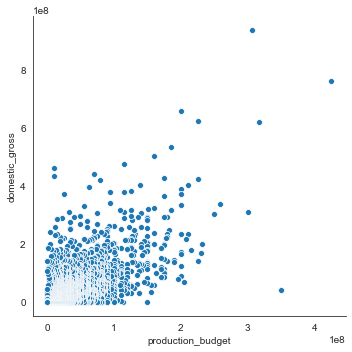

In [273]:
sns.relplot(x='production_budget', y='domestic_gross', data=gross_and_profit)


I see that there is a positive correlation between the budget and the profit, and I am now curious at what else Windows can do to increase their profits. Could there be a correlation between the lenght of the title of the film and the profit? 

To determine such, I will first add a column to show the characters within each title. 

In [288]:
gross_and_profit['title length'] = gross_and_profit['movie'].str.len()

In [289]:
gross_and_profit.head()

,domestic_gross,movie,production_budget,release_date,studio,worldwide_gross,productoin_budget,title lenght,title lenth,title length
0,760507625,Avatar,425000000,"Dec 18, 2009",Unknown Studio,2776345279,425000000.0,6,6,6
2,42762350,Dark Phoenix,350000000,"Jun 7, 2019",Unknown Studio,149762350,350000000.0,12,12,12
4,620181382,Star Wars Ep. VIII: The Last Jedi,317000000,"Dec 15, 2017",Unknown Studio,1316721747,317000000.0,33,33,33
5,936662225,Star Wars Ep. VII: The Force Awakens,306000000,"Dec 18, 2015",Unknown Studio,2053311220,306000000.0,36,36,36
7,309420425,Pirates of the Caribbean: At Worldâs End,300000000,"May 24, 2007",Unknown Studio,963420425,300000000.0,42,42,42


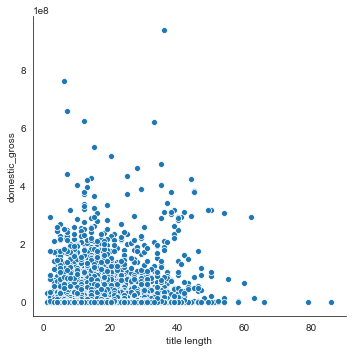

In [290]:
sns.relplot(x='title length', y='domestic_gross', data=gross_and_profit)



As expected, there is not an extremely strong correlation between title lenght and profit, although a vague correlation could be argued displaying that the longer the title, the lower the profit. 

In [292]:
gross_and_profit.drop('title lenth', axis=1, inplace=True)

gross_and_profit.drop('title lenght', axis=1, inplace=True)


I have decided now to take a look through the other data, to see if I may find other correlations with profit. 

In [302]:
votes = pd.read_csv('/Users/molly/flatiron-ds-course/project1/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/tmdb.movies.csv.gz')

In [303]:
votes.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [304]:
votes.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64